<a href="https://colab.research.google.com/github/hoangnuthuphuong/3nd_at_Uni/blob/main/%C4%90%E1%BB%92_%C3%81N_C%C3%81C_THU%E1%BA%ACT_TO%C3%81N_T%E1%BB%90I_%C6%AFU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library & dataset

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [57]:
#Import dataset
train_data = pd.read_csv("/content/train.csv")
print("train shape:", train_data.shape)
train_data.head()

train shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
test_data = pd.read_csv("/content/test.csv")
print("test shape:", test_data.shape)
test_data.head()

test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [59]:
data = pd.concat([train_data, test_data],axis=0,sort=False)
print("data shape:", data.shape)
data

data shape: (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


###Tiền xử lý dữ liệu

#### Kiểm tra các giá trị null/nan

In [6]:
#Bảng phần trăm các giá trị null của từng thuộc tính
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False),
                     'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
...,...,...
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000
GrLivArea,0,0.000000


<BarContainer object of 81 artists>

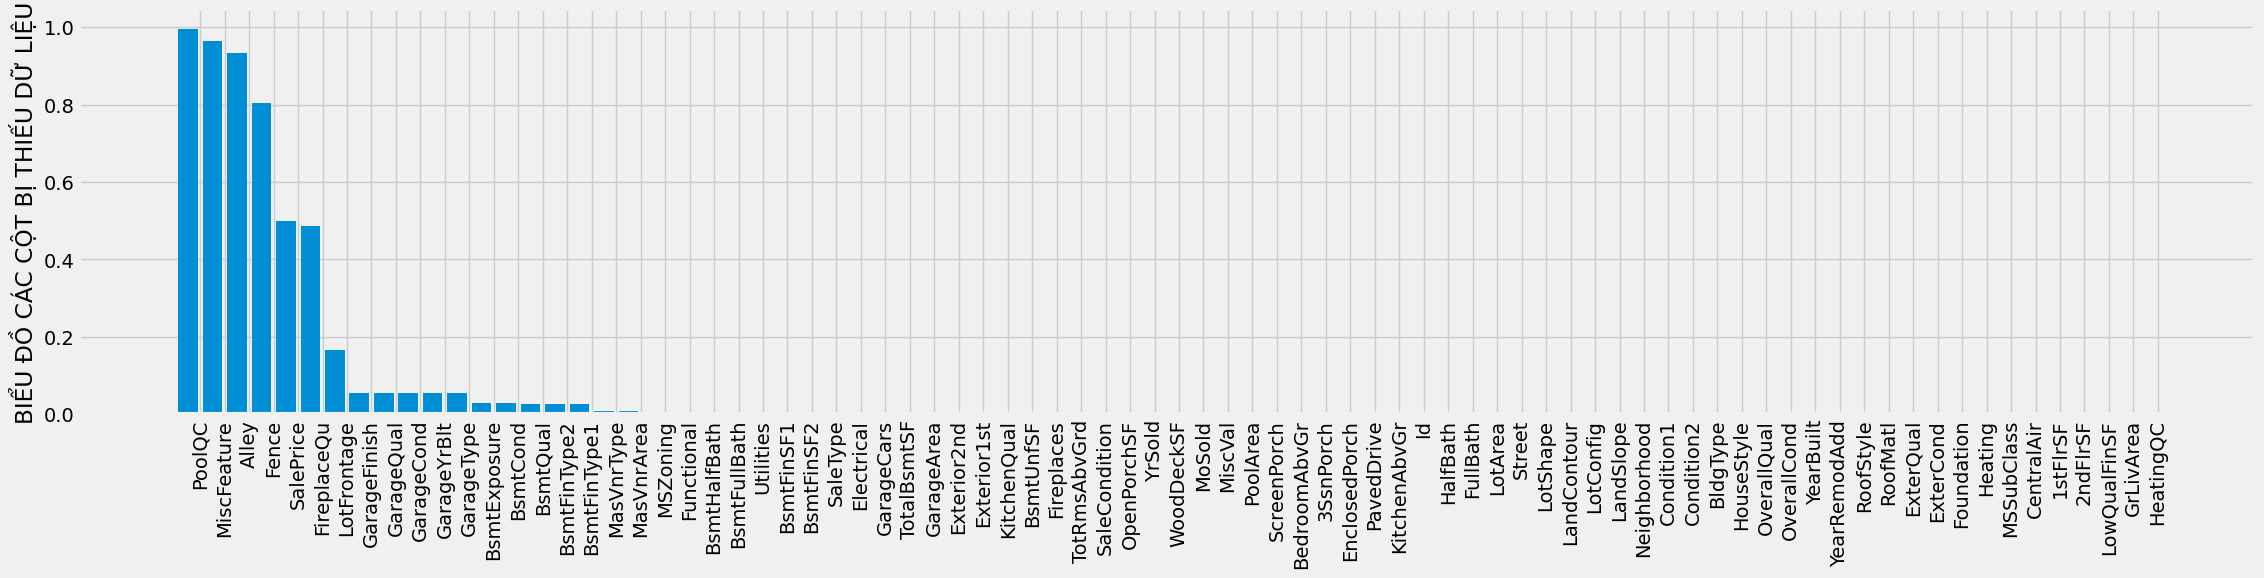

In [60]:
# Biểu đồ
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(25,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('BIỂU ĐỒ CÁC CỘT BỊ THIẾU DỮ LIỆU')
plt.bar(np.arange(len(null_counts)),null_counts)

Dựa vào biểu đồ và bảng phân tích trên, cho thấy các tập thuộc tính  [PoolQC, MiscFeature, Alley, Fence] có hơn 80% dữ liệu bị thiếu. Vậy nên, ta sẽ loại bỏ các cột dữ liệu này đi.

In [8]:
data.drop(["PoolQC","MiscFeature","Alley","Fence"],axis=1,inplace=True)
data = data.copy()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

Loại bỏ các giá trị bị miss còn lại bằng cách thay thế bằng các giá trị ngẫu nhiên được lấy từ chính các giá trị của cột thuộc tính đó. => Đây là cách tốt nhất để loại bỏ các giá trị miss nhưng vẫn có thể duy trì sự phân phối cho từng tính năng.

In [10]:
#Hàm thay thế missing value bằng giá trị ngẫu nhiên trong cột thuộc tính
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

for col in data:
    Random_value_imputation(col)

Bởi thuộc tính Id không có mang bất kì mục đích nào cho dự đoán. Nên ta sẽ lược bỏ nó ra khỏi tập dữ liệu.

In [11]:
columns_to_drop = ['Id']
data = data.drop(columns=columns_to_drop)

<BarContainer object of 76 artists>

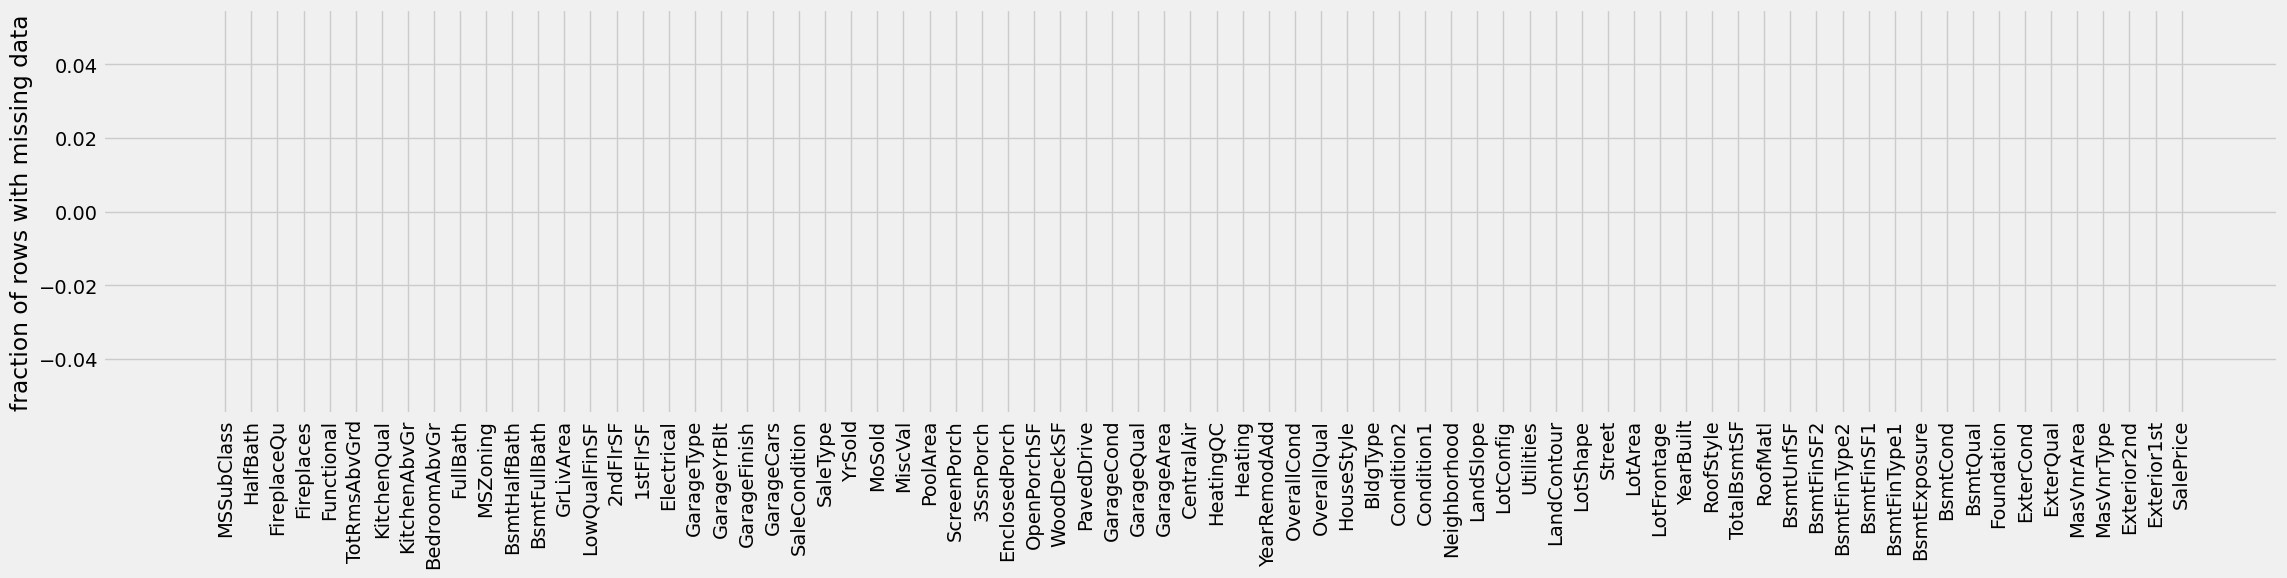

In [12]:
# Kiểm tra lại bằng biểu đồ
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(25,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

=> Các giá trị null đã được loại bỏ hết ra khỏi tập dữ liệu

Kiểm tra dữ liệu trùng lặp

In [13]:
duplicate = data.duplicated()
print(duplicate.sum())

0


=> Không có dữ liệu bị trùng lặp

In [14]:
data = pd.get_dummies(data)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


<Axes: >

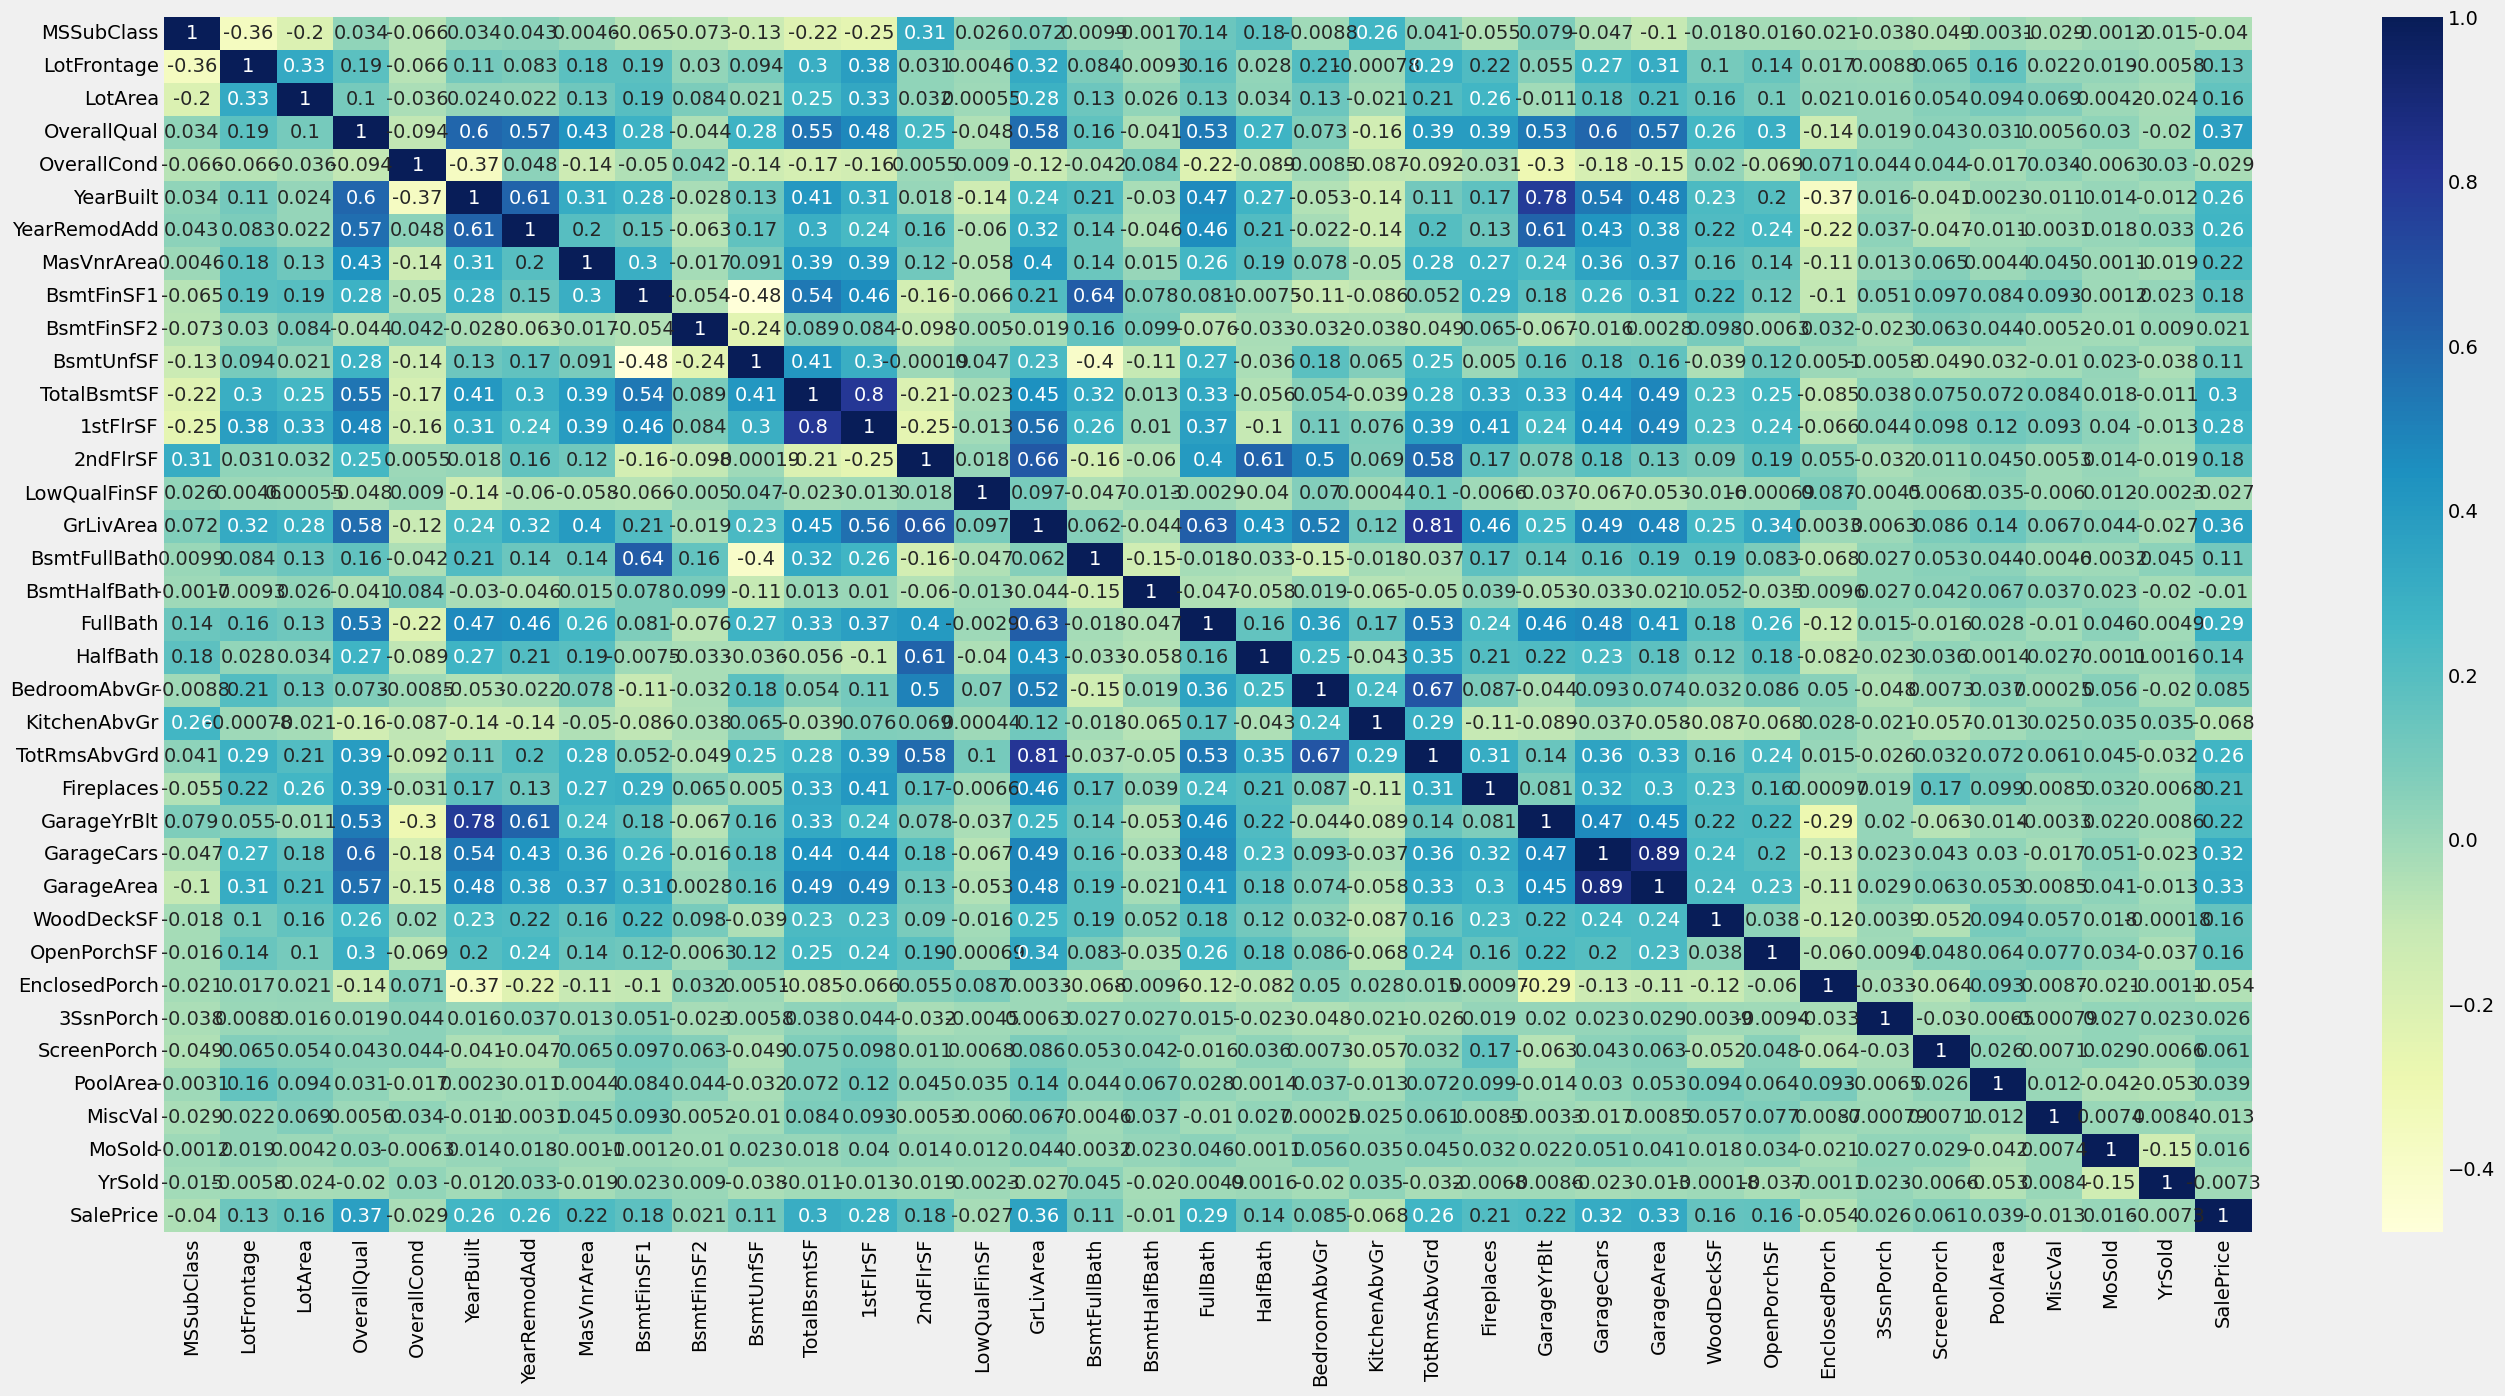

In [69]:
# Correlation
plt.rcParams['figure.figsize'] = (30, 15)
corr_df = data.corr()
sns.heatmap(corr_df,annot=True , cmap="YlGnBu")

In [70]:
# Bảng phân tích tương quan giữa SalePrice và các thuộc tính khác
co_relation=pd.DataFrame(data.corr()["SalePrice"].sort_values(ascending = False).to_frame().head(10))
cmap = sns.light_palette("cyan", as_cmap = True)
s = co_relation.style.background_gradient(cmap = cmap)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.374727
GrLivArea,0.364006
GarageArea,0.326699
GarageCars,0.315824
TotalBsmtSF,0.303018
FullBath,0.287360
1stFlrSF,0.280640
YearRemodAdd,0.263993
TotRmsAbvGrd,0.262017


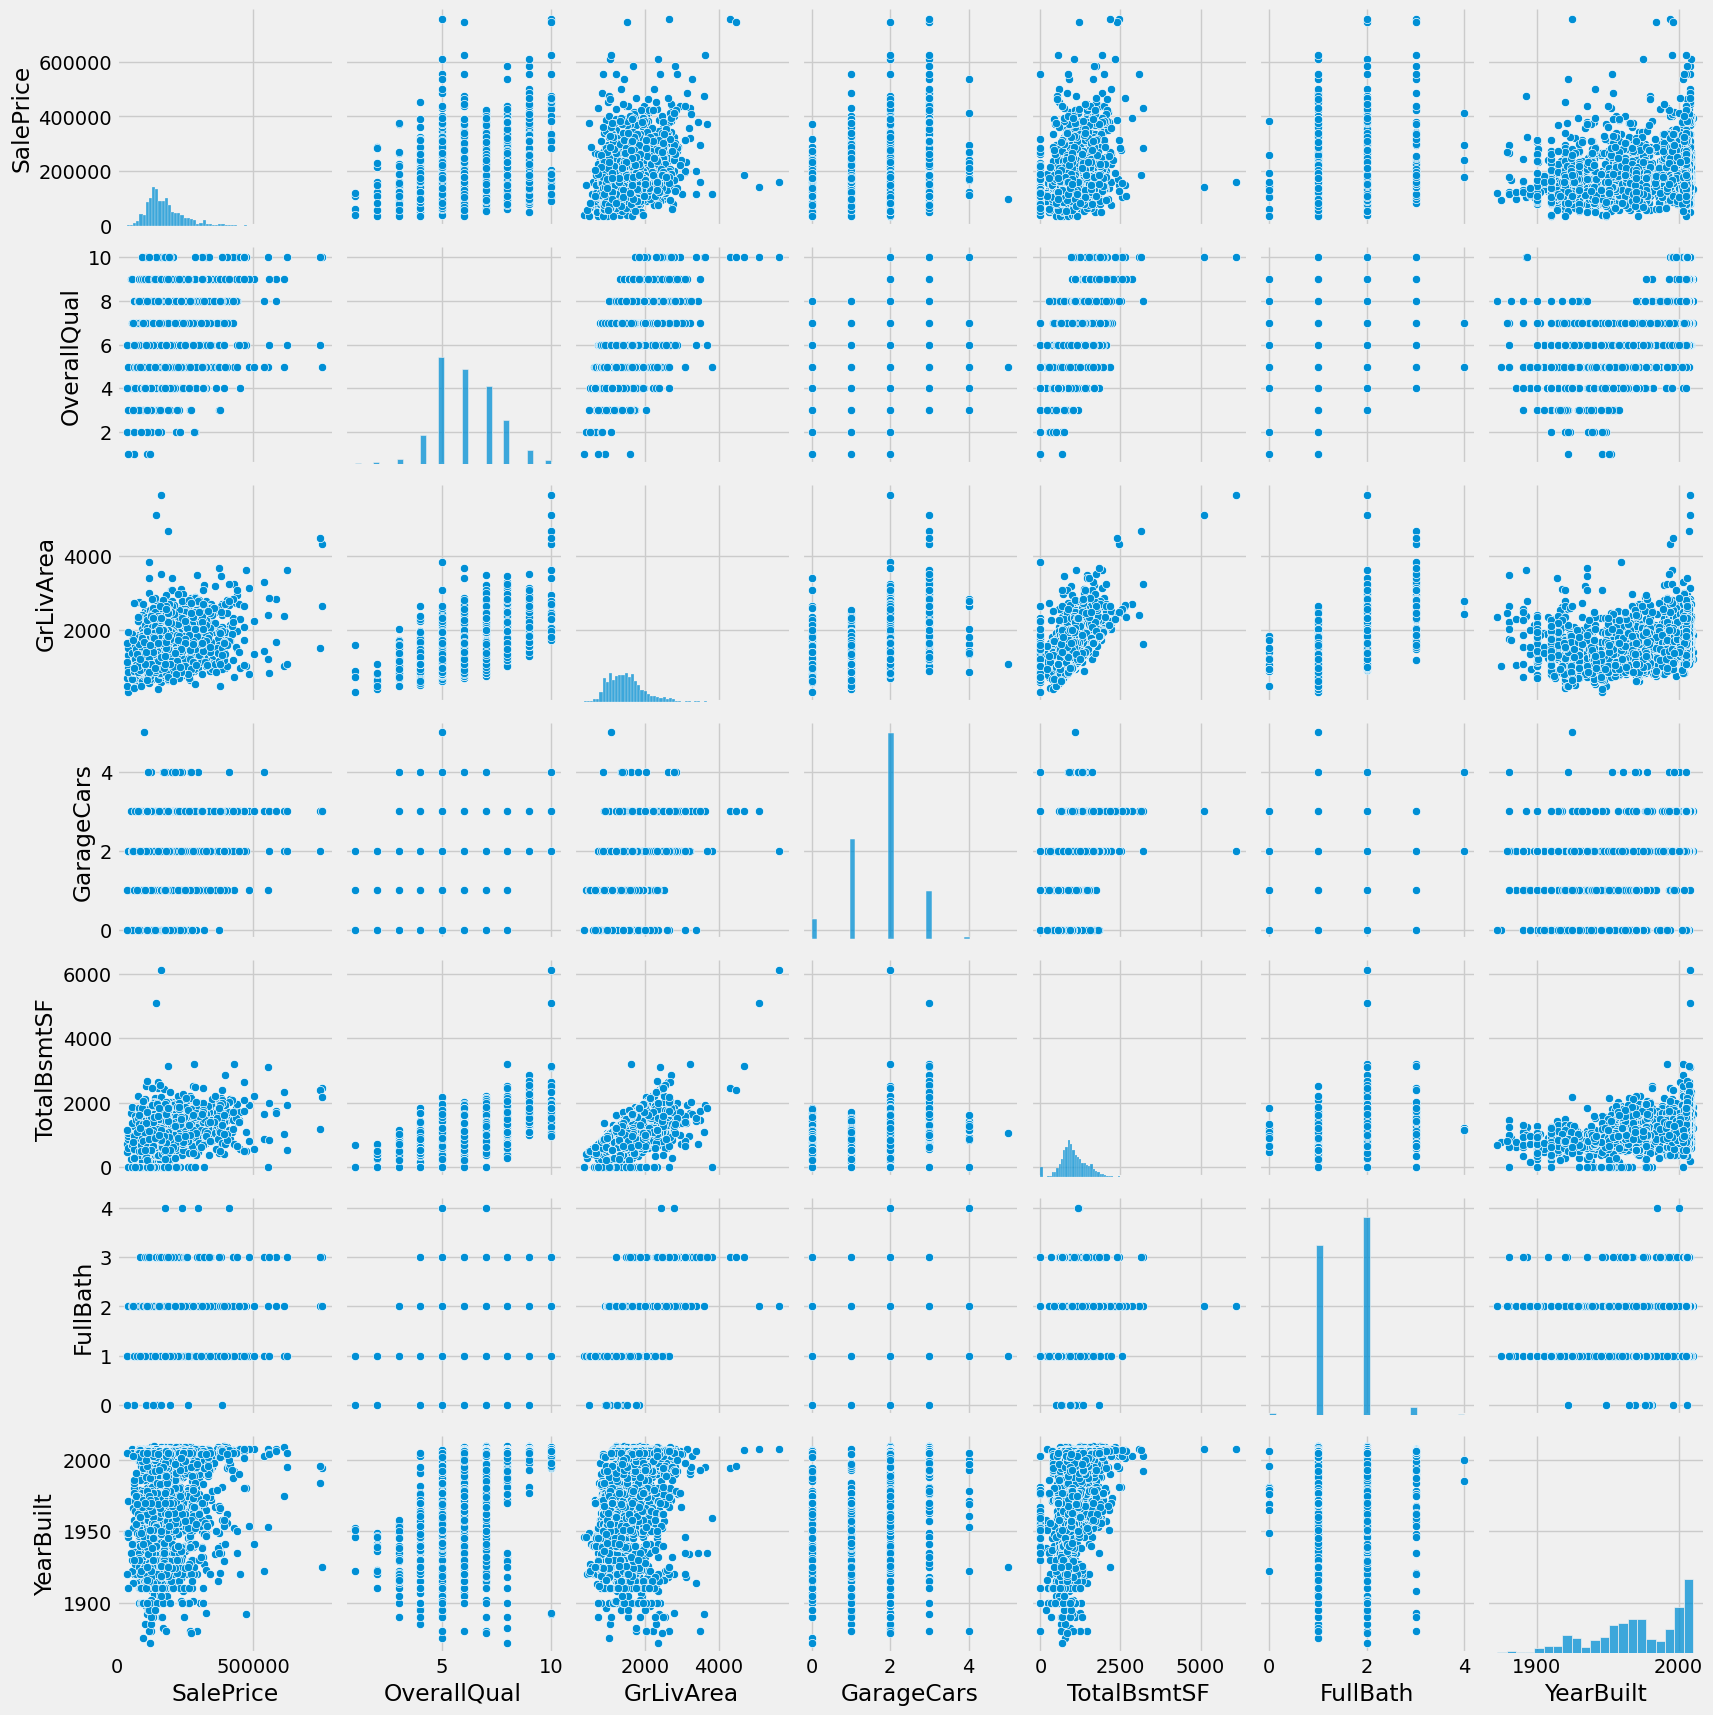

In [27]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5 , palette = 'seaborn')
plt.show()

In [ ]:
# Vẽ đồ thị barplot
y_values = co_relation.values.flatten()  # Chuyển đổi thành mảng 1D
plt.barh(co_relation.index, y_values, orientation="horizontal")
plt.title("Biểu đồ tương quan")
plt.ylabel("Cột dữ liệu")
plt.xlabel("Tương quan")
plt.figure(figsize=(5, 5), dpi=150)
plt.show()

Từ bảng phân tích tương quan, ta có thể rút ra nhận xét răng: chất lượng tổng thể của ngôi nhà càng tốt thì giá của căn nhà sẽ càng cao, và điều này cũng tương tự với khu vực sinh sống, tức là khi diện tích càng lớn thì giá của ngôi nhà cũng càng cao.

Chuyển đổi các biến phân loại sang nhị phân

TẠO THUỘC TÍNH HOUSE AGE

In [15]:
from datetime import date , datetime
Today = date.today()
def calculate_age(YearBuilt):
    YearBuilt = str(YearBuilt)
    Built  = datetime.strptime(YearBuilt,"%Y").date()
    return Today.year - Built.year

In [17]:
data['HouseAge'] = data['YearBuilt'].apply(calculate_age)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,0,0,0,0,1,0,21
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,1,0,48
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,0,0,0,0,1,0,23
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,1,0,0,0,0,0,109
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,0,0,0,0,1,0,24


In [28]:
data.drop('YearBuilt',axis=1,inplace=True)
data.drop('YearRemodAdd',axis=1,inplace=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge
0,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,...,0,0,1,0,0,0,0,1,0,21
1,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,...,0,0,1,0,0,0,0,1,0,48
2,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,...,0,0,1,0,0,0,0,1,0,23
3,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,...,0,0,1,1,0,0,0,0,0,109
4,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,...,0,0,1,0,0,0,0,1,0,24


In [29]:
# Bảng phân tích tương quan giữa SalePrice và các thuộc tính khác
co_relation=pd.DataFrame(data.corr()["SalePrice"].sort_values(ascending = False).to_frame().head(10))
cmap = sns.light_palette("cyan", as_cmap = True)
s = co_relation.style.background_gradient(cmap = cmap)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.391826
GrLivArea,0.391313
GarageArea,0.355395
GarageCars,0.353336
TotalBsmtSF,0.326110
1stFlrSF,0.315089
FullBath,0.296611
TotRmsAbvGrd,0.286194
BsmtQual_Ex,0.269986


Tách ra giá trị phụ thuộc và độc lập

In [38]:
y=data['SalePrice']
X=data.drop('SalePrice',axis=1)
cols=X.columns
cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'HouseAge'],
      dtype='object', length=274)

Phân chia tập dữ liệu train-test

In [39]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)

In [40]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (2043, 274)
X_test shape is  (876, 274)
y_train shape is  (2043,)
y_test shape is  (876,)


In [41]:
print('Original X Shape is ' , X.shape)

Original X Shape is  (2919, 274)


Xây dựng hàm cho các mô hình học máy

In [42]:
# Hàm dự đoán và biểu đồ trực quan
def predplot(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction[:10]))
    sns.distplot(y_test-y_prediction)

In [43]:
# Hàm so sánh chỉ số các mô hình
def predictn(ml_model):
    model = ml_model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    y_prediction = model.predict(X_test)
    r2_score = metrics.r2_score(y_test, y_prediction)
    MAE = metrics.mean_absolute_error(y_test, y_prediction)
    MSE = metrics.mean_squared_error(y_test, y_prediction)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_prediction))
    return {
        "training_score": training_score,
        "r2_score": r2_score,
        "MAE": MAE,
        "MSE": MSE,
        "RMSE": RMSE
    }



Training score : 0.880845519787305
predictions are: 
 [167442.28 201932.96 256613.68 146941.9  283124.14 186971.02 186424.06
 164477.64 155906.3  280170.28]


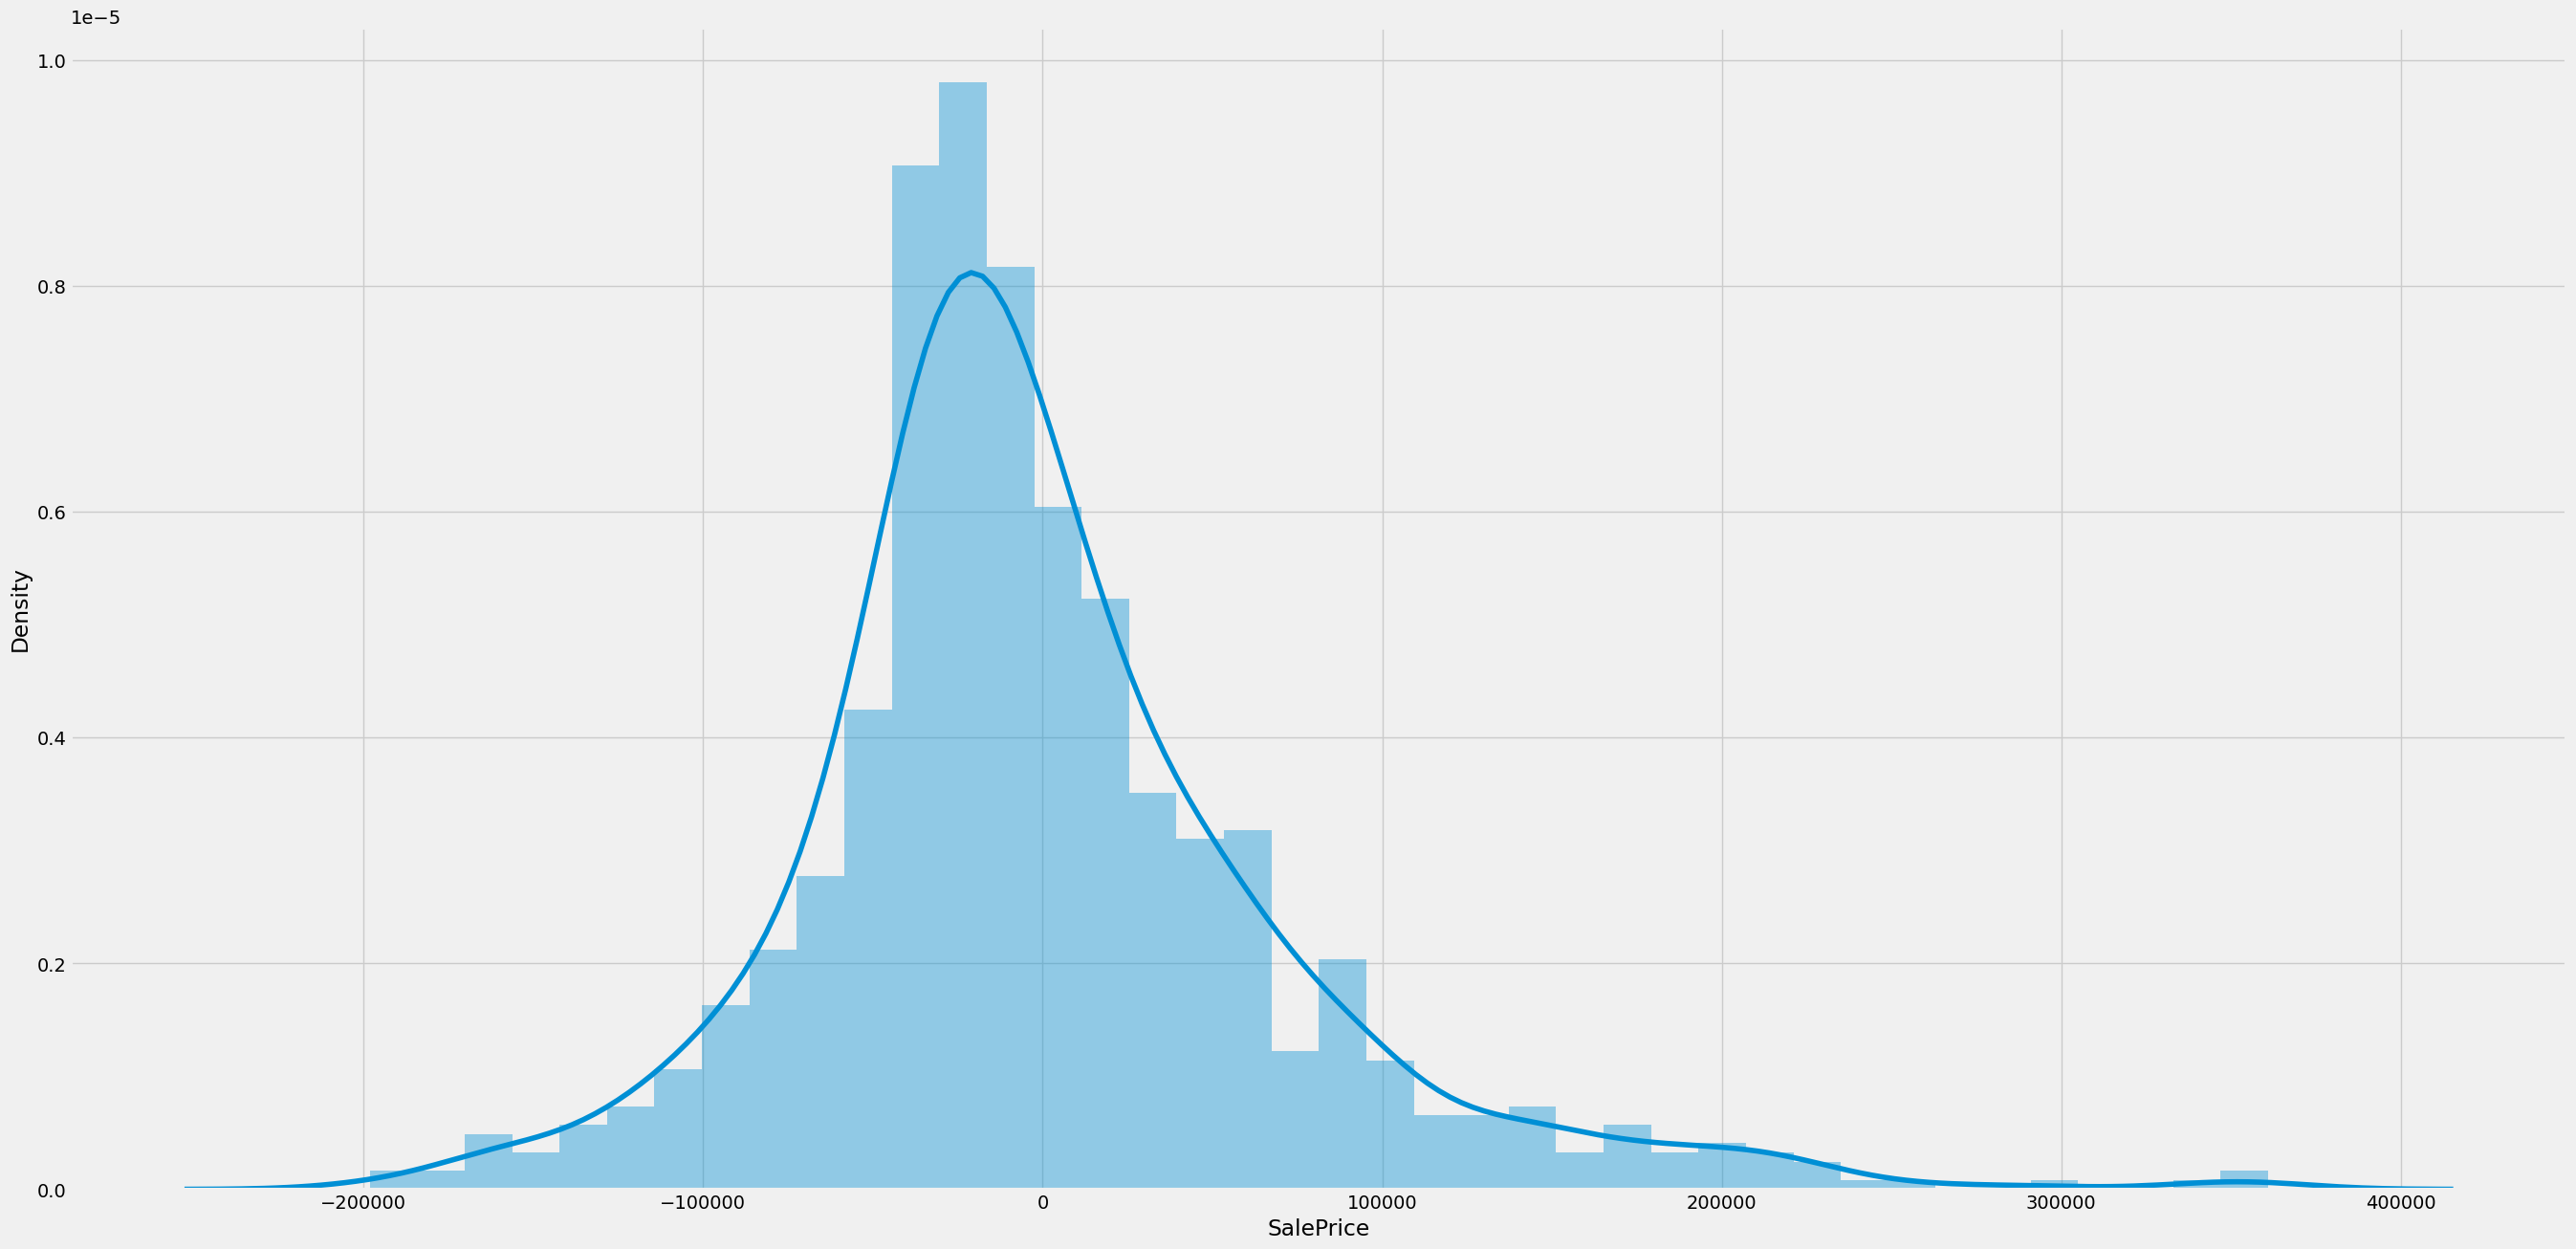

In [44]:
rfg=predplot(RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth = 70))
rfg

In [ ]:
gbr=predplot(GradientBoostingRegressor(alpha=.9 , n_estimators=12,learning_rate=0.5, max_depth=12))
gbr

In [ ]:
kn=predplot(KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='ball_tree', leaf_size=40))
kn

In [ ]:
dt=predplot(DecisionTreeRegressor(max_depth=25,random_state=33))
dt

In [ ]:
xgb=predplot(XGBRegressor())
xgb

In [45]:
# Hàm so sánh
from xgboost import XGBRegressor
ml_models = [RandomForestRegressor(ccp_alpha=0.1,n_estimators=50, max_depth = 70),
             GradientBoostingRegressor(alpha=.9 , n_estimators=12,learning_rate=0.5, max_depth=12),
             XGBRegressor(),
             KNeighborsRegressor(n_neighbors=3,
                                weights='distance',
                                algorithm='ball_tree',
                                leaf_size=40),
             DecisionTreeRegressor(max_depth=25,random_state=33)]
results = []

for model in ml_models:
    model_name = str(model).split("(")[0]
    scores = predictn(model)
    results.append({
        "model": model_name,
        "r2_score": scores["r2_score"],
        "MAE": scores["MAE"],
        "MSE": scores["MSE"],
        "RMSE": scores["RMSE"]
    })

df = pd.DataFrame(results)
df

,model,r2_score,MAE,MSE,RMSE
0,RandomForestRegressor,0.170666,50024.770426,4.885025e+09,69892.956181
1,GradientBoostingRegressor,-0.140066,57625.832942,6.715329e+09,81947.109317
2,XGBRegressor,0.053641,53217.309575,5.574335e+09,74661.471235
3,KNeighborsRegressor,-0.048262,56616.212321,6.174577e+09,78578.479590
4,DecisionTreeRegressor,-0.825609,71941.933532,1.075338e+10,103698.517106


$$R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}$$

$$MAE = \frac{\sum_i |y_i - \hat{y}_i|}{n}$$



$$MSE = \frac{\sum_i (y_i - \hat{y}_i)^2}{n}$$


$$RMSE = \sqrt{MSE}$$

In [54]:
df1 = df.sort_values(by='r2_score', ascending=False)
df1

,model,r2_score,MAE,MSE,RMSE
0,RandomForestRegressor,0.170666,50024.770426,4.885025e+09,69892.956181
2,XGBRegressor,0.053641,53217.309575,5.574335e+09,74661.471235
3,KNeighborsRegressor,-0.048262,56616.212321,6.174577e+09,78578.479590
1,GradientBoostingRegressor,-0.140066,57625.832942,6.715329e+09,81947.109317
4,DecisionTreeRegressor,-0.825609,71941.933532,1.075338e+10,103698.517106


In [56]:
df2 = df.sort_values(by='RMSE', ascending=True)
df2

,model,r2_score,MAE,MSE,RMSE
0,RandomForestRegressor,0.170666,50024.770426,4.885025e+09,69892.956181
2,XGBRegressor,0.053641,53217.309575,5.574335e+09,74661.471235
3,KNeighborsRegressor,-0.048262,56616.212321,6.174577e+09,78578.479590
1,GradientBoostingRegressor,-0.140066,57625.832942,6.715329e+09,81947.109317
4,DecisionTreeRegressor,-0.825609,71941.933532,1.075338e+10,103698.517106
